In [405]:
pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\tiffh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [406]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\tiffh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [407]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\tiffh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [408]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\tiffh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [409]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [410]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import missingno
%matplotlib inline

In [412]:
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [413]:
import opendatasets as od
import pandas as pd
 
od.download(
    "https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database")

Skipping, found downloaded files in ".\pima-indians-diabetes-database" (use force=True to force download)


In [414]:
import pandas as pd

df = pd.read_csv(".\pima-indians-diabetes-database\diabetes.csv")
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [415]:
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Preparation

In [431]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [432]:
# Find the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [433]:
# Number of Unique values (Duplicate)
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

The dataset has 768 samples.
There is no null value/missing value.

In [434]:
df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

From the data, we can see that the minimun age is 21 years old. And, there are some attributes are not valid as the minimum value is zero such as blood pressure, insulin and etc.

In [435]:
df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [436]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

From this output, we know that the data is not balanced as it has more not diabetic than diabetic. 500 not diabetic and 268 are diabetic.

In [438]:
# Check the average of features grouped by Outcome (Diabetes)

df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


From the result, we can see that the average number of the features are higher with diabetic women.

In [161]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

The output might have some skewed or incorrect as there are some missing values(0) for some of the features.

In [162]:
# Shows women that contains information about Glucose

df_glucose = df.loc[df['Glucose'] != 0]

df_glucose

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [163]:
df_glucose.shape

(763, 9)

From above, we can see that most of the sample have data for glucose as it is an important information(same as insulin)to check on for diabetes.

In [164]:
#Check the average of glucose from the data that is not zero.

df_glucose['Glucose'].mean()

121.6867627785059

This indicates that the average of glucose is at the normal range (less than 140 mg/dl).
Which somehow makes sense as the sampe has more women without diabetics.

In [165]:
df_glucose.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.311871,110.643863,68.213280,19.631791,69.160966,30.317304,0.430662,31.247485
1,4.860902,142.319549,70.800752,22.056391,101.090226,35.106015,0.550605,37.052632


In [166]:
#Check the minimum and maximum values of glucose that omits the zero value.

In [167]:
df_glucose['Glucose'].min()

44

In [168]:
df_glucose['Glucose'].max()

199

In [169]:
df_insulin = df.loc[df['Insulin'] != 0]
df_insulin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


There are quite a few data for insulin is missing in this sample. Therefore, this will probably change some of our result. This might be a further discussion.

From the sample, there are data with glucose but no insulin information. The maximum of glucose in this dataset is 199, which is diabetic level. However, not a lot of them are with high glucose, this might indicate that they have been taking drugs to control the level. We will require more information on those.

In [170]:
# Shows women that have information about Blood pressure

df_BloodPressure = df.loc[df['BloodPressure'] != 0]
df_BloodPressure

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [171]:
df_BloodPressure.shape

(733, 9)

In [172]:
# Check the average of blood pressure from data that is not zero

df_BloodPressure['BloodPressure'].mean()

72.40518417462484

In [173]:
# Minimum and Maximum for the Blood Pressure(excluding zero values)

df_BloodPressure['BloodPressure'].min()

24

In [174]:
df_BloodPressure['BloodPressure'].max()

122

There are 35 women that don't have information on blood pressure. The maximum value of Diastolic Blood Pressure(lower number) shows that some women have hypertension (>90 mmHg) as blood pressure target for diabetes is under 140/90 mmHg and under 150/90 mmHg if the person is over 80 years(The British Diabetic Association, n.d.) And, for some people with kidney disease, the target might be 130/80 mmHg.

In this dataset, the Systolic Blood pressure is not included but it should have been as it is an indicator. The reason is the blood pressure can also indicate other diseases, such as kidney disease, heart disease and etc.(U.S. Department of Health & Human Services, 2021) On the other hand, if we look at the minimum value of f Diastolic Blood Pressure (24 mmHg) it is too low and will make people feel dizzy or get tired easily. The  Individual with Diastolic blood pressure less than 80 mmHg has low blood pressure and for older people, it should be between 90 and 60.(Windsor, 2015).

In [175]:
df_insulin = df.loc[df['Insulin'] != 0]

df_insulin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [176]:
df_insulin.shape

(394, 9)

In [177]:
# check average value of insulin excluding zero value

df_insulin['Insulin'].mean()

155.5482233502538

In [178]:
# Minimum and Maximum of Insulin value

df_insulin['Insulin'].min()

14

In [179]:
df_insulin['Insulin'].max()

846

The normal range of 2 hours insulin is from 16 to 166 mu U/mL. The average for this samples indicate normal range. There are some samples seem to have high insulin level. It might be due to obesity, type 2 diabetes mellitus or the data record in error.

In [180]:
# Check BMI value excluding zero value

df_BMI = df.loc[df['BMI'] != 0]
df_BMI

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [181]:
df_BMI.shape

(757, 9)

In [182]:
# Check average of BMI excluding zero values

df_BMI['BMI'].mean()

32.457463672391015

The average of BMI showed obesity (BMI >= 30 kg/m2)

In [183]:
#check Minimum and Maximum of BMI(excluding zero)
df_BMI['BMI'].min()

18.2

In [184]:
df_BMI['BMI'].max()

67.1

The minimum value of BMI is 18.2 kg/m 2 is a little closer to underweight for 18.5 kg/m 2. The maximum is showing women with morbid obesity.(BMI >= 40kg/m 2)

In [185]:
# Check only the women that have all the values of BMI, Glucose, Insulin and Blood Pressure

df_all = df.loc[(df['BMI'] != 0) & (df['Insulin'] != 0) & (df['BloodPressure'] != 0) & (df['Glucose'] != 0)]
df_all 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [186]:
df_all.shape

(392, 9)

From this data filter, we can see that there are only 392 women have all the information for all the attributes. This is around half of the original data. 392/768

In [187]:
df_all['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

From the filtered data, the women who are not diabetic is 262 and diabetic is 130. The data is still unbalanced.

In [441]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [440]:
df_all.mean()

Pregnancies                   3.301020
Glucose                     122.627551
BloodPressure                70.663265
SkinThickness                29.145408
Insulin                     156.056122
BMI                          33.086224
DiabetesPedigreeFunction      0.523046
Age                          30.864796
Outcome                       0.331633
dtype: float64

In [439]:
df_all.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


From above result, the diabetic women have higher number of pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function and age. The BMI of both groups are high and indicate obesity. The normal range of insulin is (16-166 mu U/mL). However, both groups are showing higher than normal. This might mean that some women in non diabetic group are in risk of having diabetes.

In [190]:
df_all.min()

Pregnancies                  0.000
Glucose                     56.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.085
Age                         21.000
Outcome                      0.000
dtype: float64

In [191]:
df_all.max()

Pregnancies                  17.00
Glucose                     198.00
BloodPressure               110.00
SkinThickness                63.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

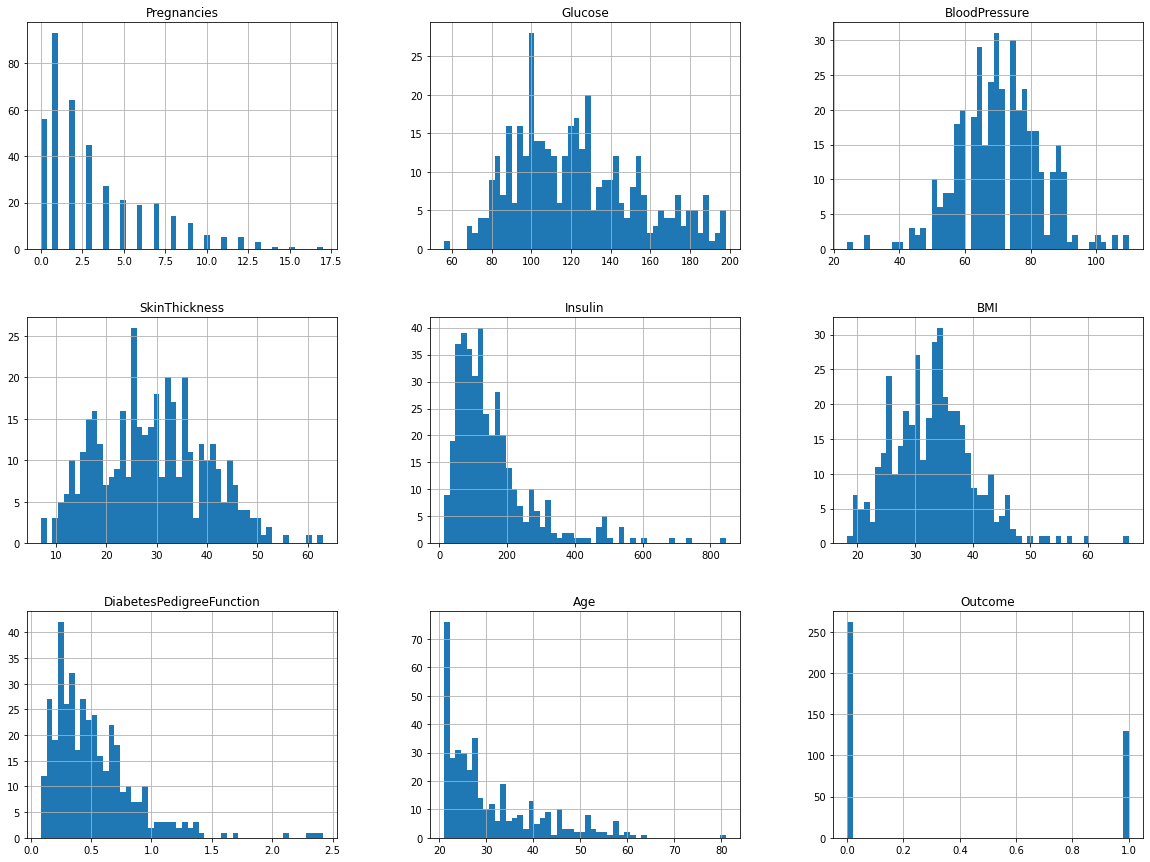

In [192]:
#Histogram (Distribution)

df_all.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\tiffh\AppData\Local\Temp\ipykernel_40096\2118785327.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age, bins = 20, ax=ax[0,0])
C:\Users\tiffh\AppData\Local\Temp\ipykernel_40096\2118785327.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1])


<AxesSubplot:xlabel='BMI', ylabel='Density'>

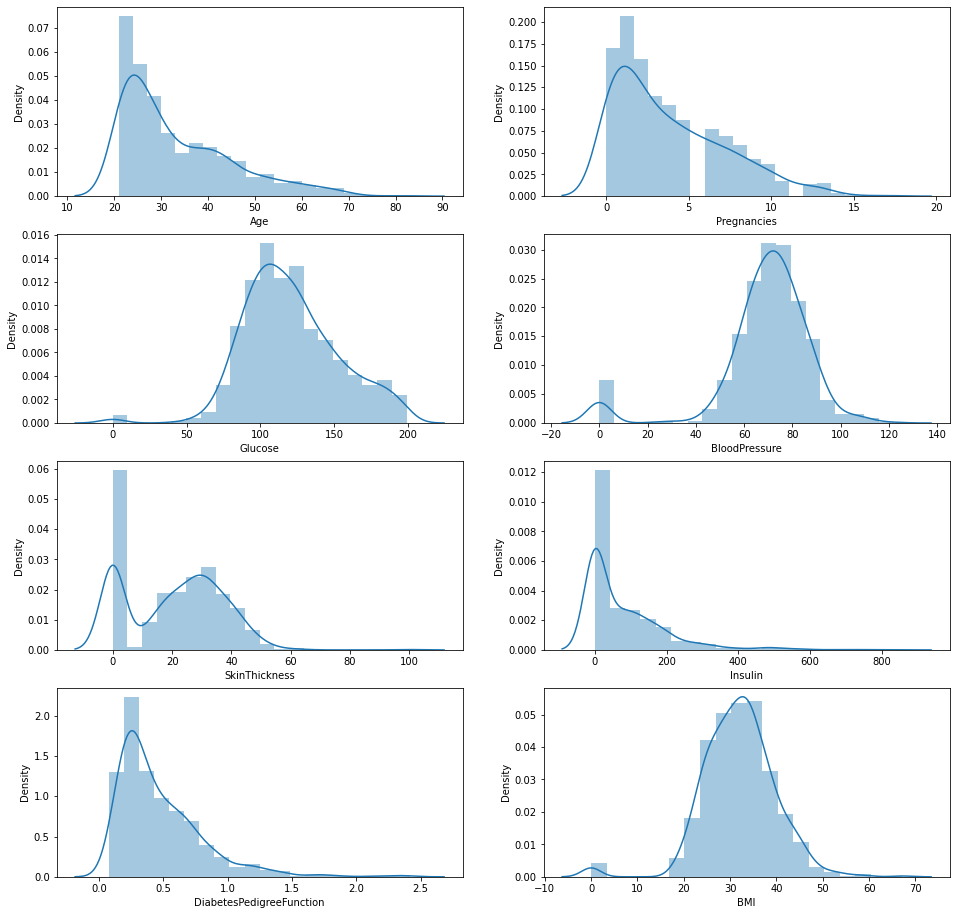

In [193]:
# Histogram and density graphs of all variables
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

Bell shape: BMI and Blood pressure

Right-Skewed: Age, Pregnancies, Insulin,Diabetes Pedigree Function

<AxesSubplot:xlabel='Age'>

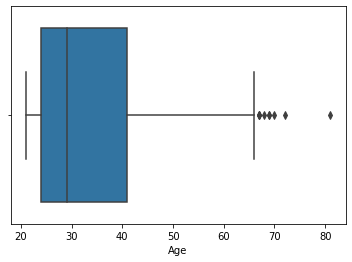

In [194]:
sns.boxplot(x = df["Age"]) 

<AxesSubplot:xlabel='Pregnancies'>

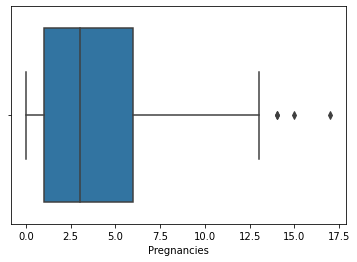

In [195]:
sns.boxplot(x = df["Pregnancies"]) 

<AxesSubplot:xlabel='Glucose'>

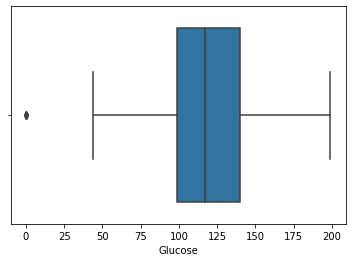

In [196]:
sns.boxplot(x = df["Glucose"]) 

<AxesSubplot:xlabel='BloodPressure'>

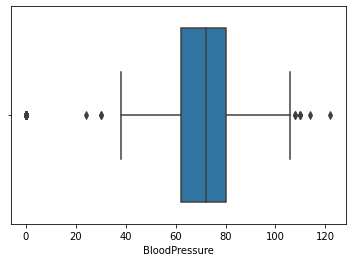

In [197]:
sns.boxplot(x = df["BloodPressure"]) 

<AxesSubplot:xlabel='SkinThickness'>

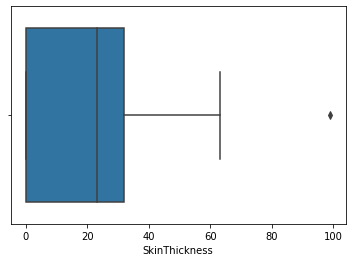

In [198]:
sns.boxplot(x = df["SkinThickness"])

<AxesSubplot:xlabel='Insulin'>

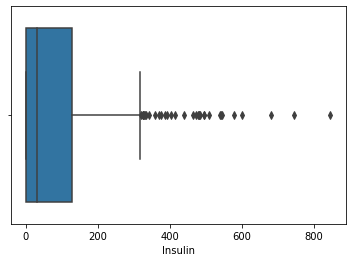

In [199]:
sns.boxplot(x = df["Insulin"])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

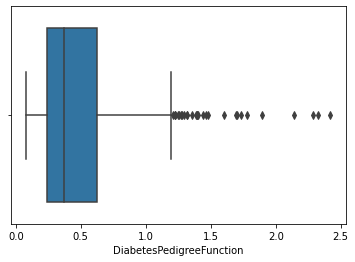

In [200]:
sns.boxplot(x = df["DiabetesPedigreeFunction"]) 

<AxesSubplot:xlabel='BMI'>

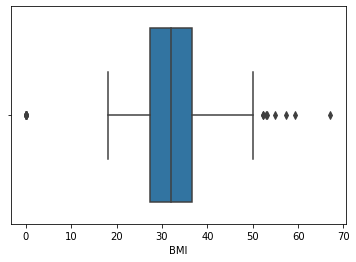

In [201]:
sns.boxplot(x = df["BMI"]) 

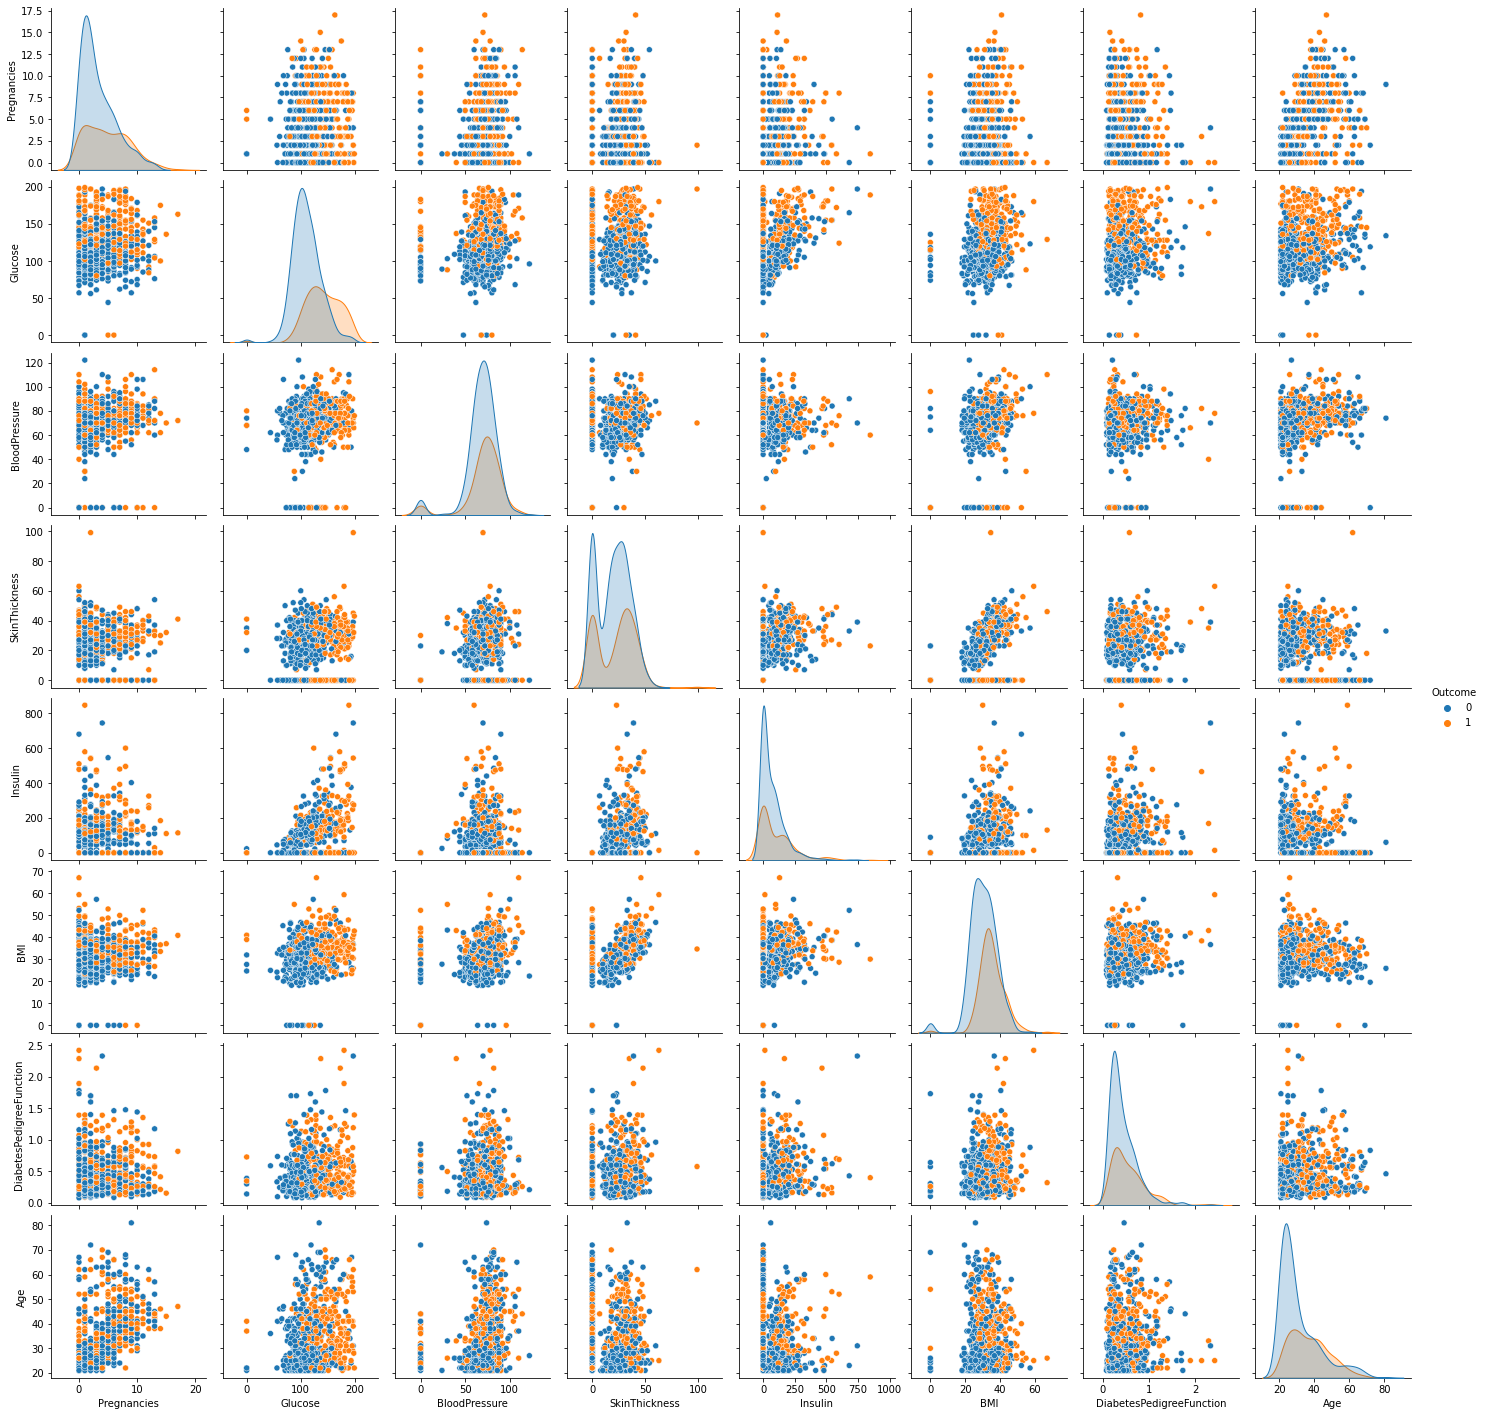

In [202]:
sns.pairplot(df,hue='Outcome')
plt.show()

From the pair plot, it showed that diabetic women have higher value on age, insulin, BMI, skin thickness, blood pressure and pregnancies.

The glucose to diabetes have two distinct group.

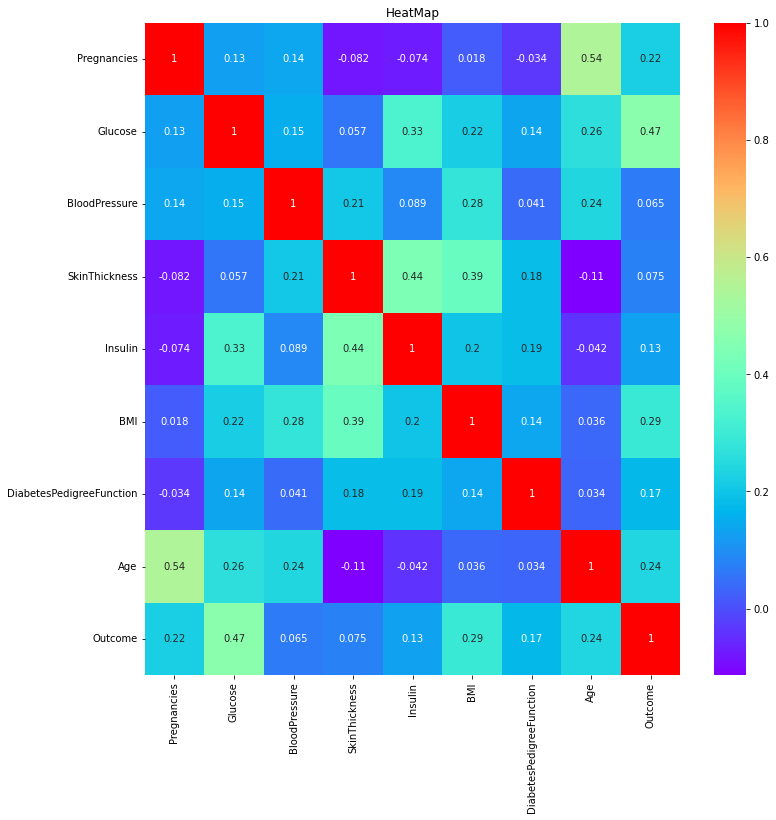

In [203]:
Corr = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(Corr,annot=True,cmap='rainbow')
plt.title('HeatMap')
plt.show()

Due to the missing values in some of the features, it will affect the final result. Therefore, we input the median for "0" value.

In [443]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [444]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [445]:
# We can see where the missing values are:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

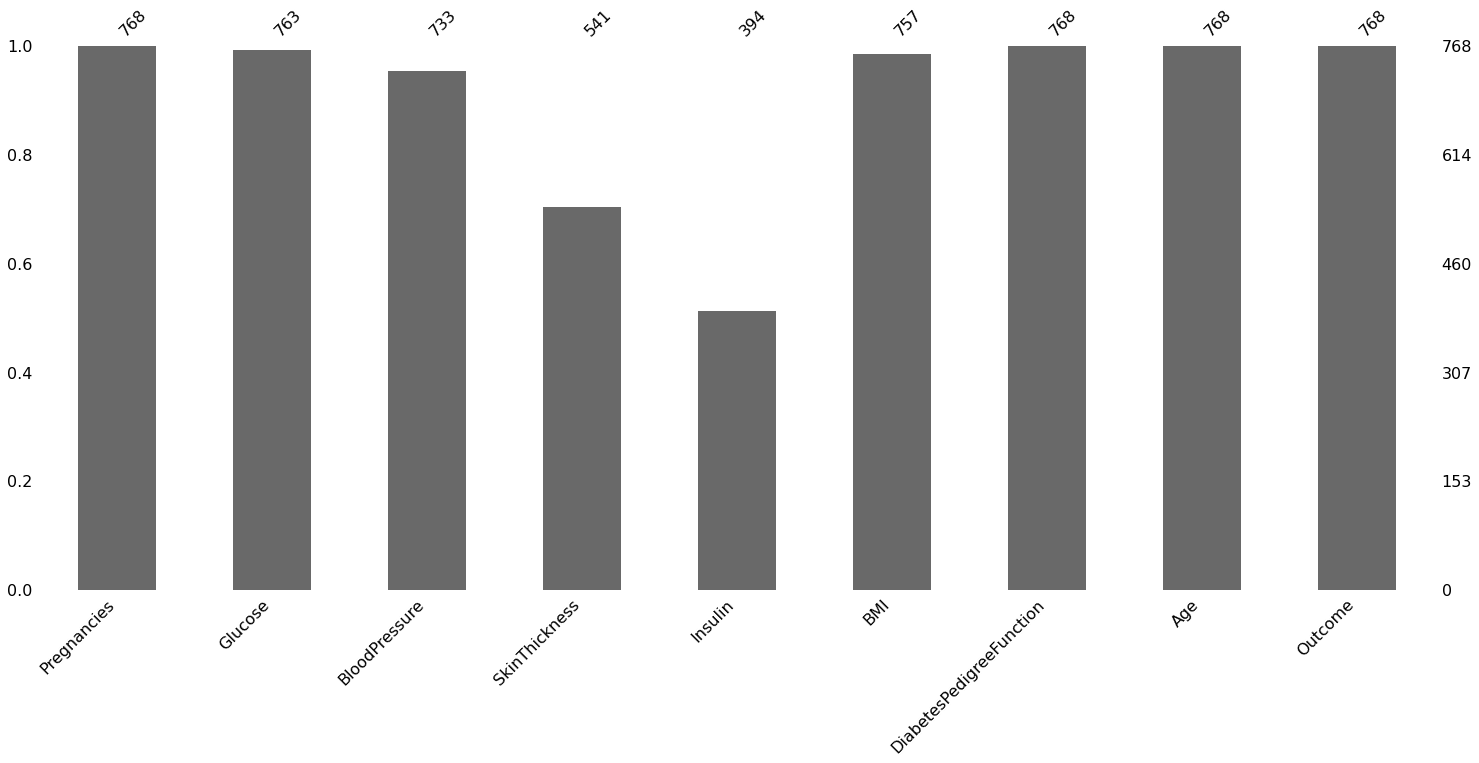

In [398]:
# Visualized using the missingno library for the visualization of missing observations.
# Plotting 
import missingno as msno
msno.bar(df);

In [446]:
# The missing values ​​will be filled with the median values ​​of each variable. The reason for this as mean might be skewed.
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [448]:
# The values that is filled is based on the median's of the outcome(Yes and No for diabetes).
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [449]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [450]:
# Missing values were all replaced.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [453]:
df_all.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


In [456]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [454]:
df.mean()

Pregnancies                   3.845052
Glucose                     121.677083
BloodPressure                72.389323
SkinThickness                29.089844
Insulin                     141.753906
BMI                          32.434635
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

From the new mean, we can see that the mean has changed as we filled the "0" value.

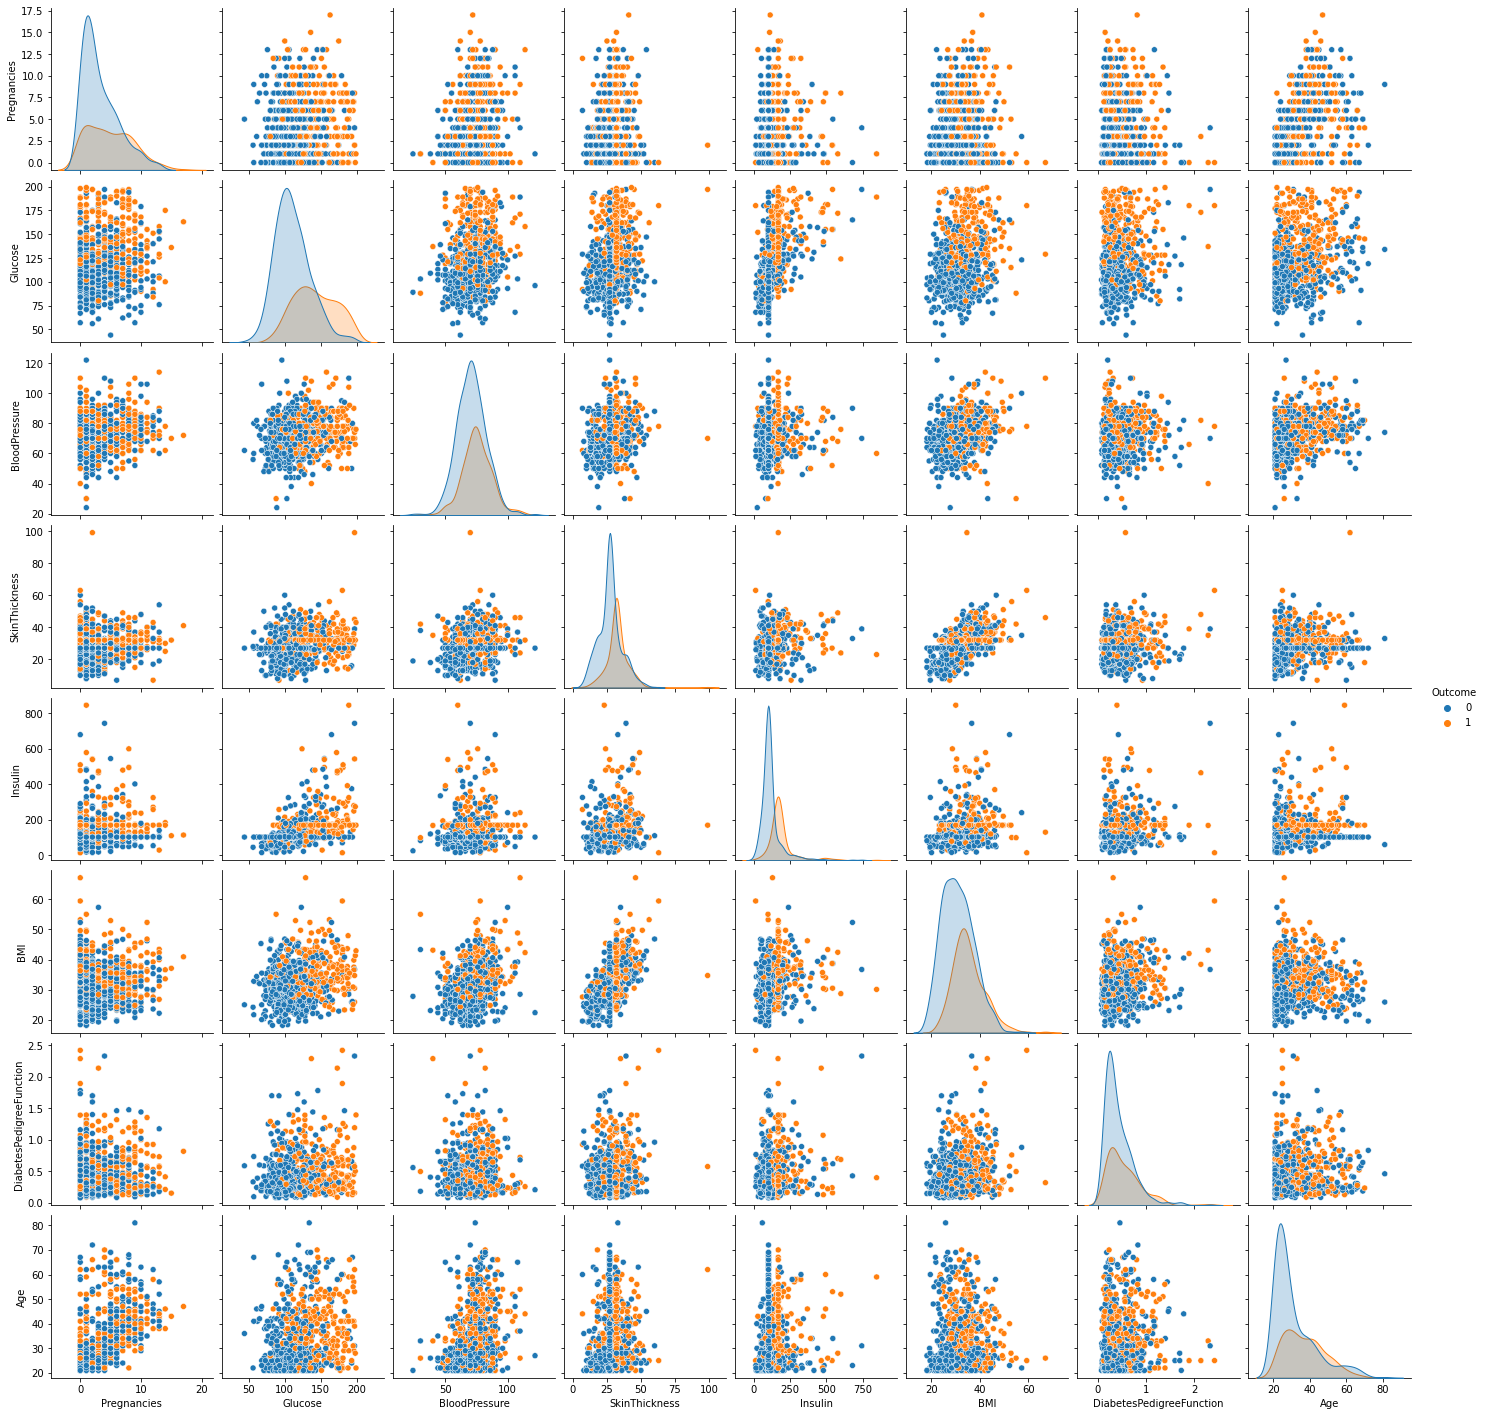

In [213]:
sns.pairplot(df,hue='Outcome')
plt.show()

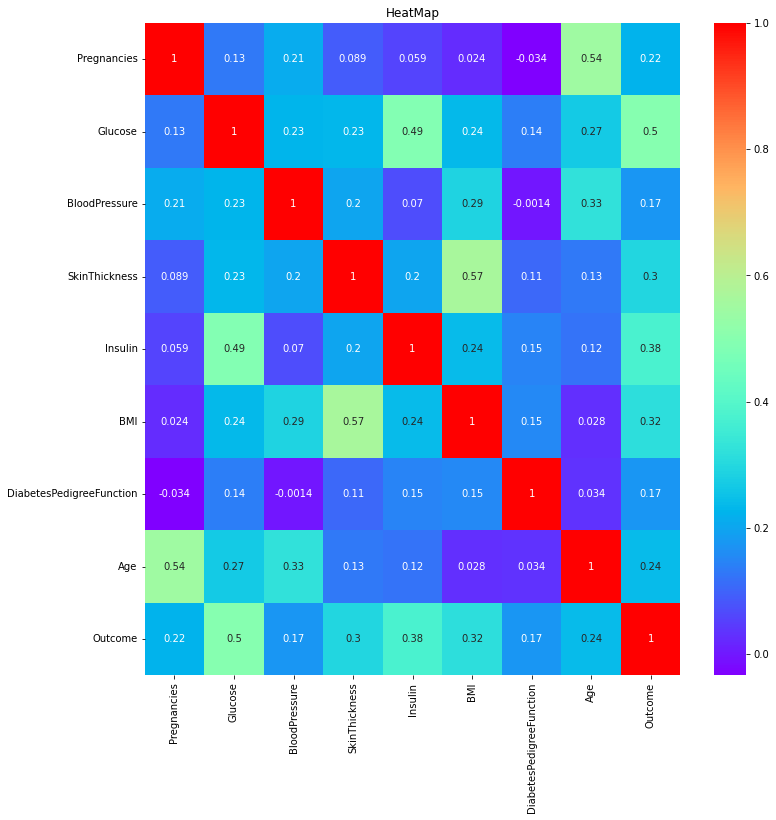

In [214]:
Corr = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(Corr,annot=True,cmap='rainbow')
plt.title('HeatMap')
plt.show()

Data Split

In [356]:
# Drop the "Outcome" column for the new dataset

A = df.drop(columns='Outcome', axis=1)

# Creating the target variable
B = df['Outcome']

In [357]:
# Display the variable
A

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47


In [358]:
# Display target variable
B

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Data Standardization

In [359]:
# Creating a Standard Scaler
scaler = StandardScaler()

In [360]:
# Fit the StandScaler to variables (A)
scaler.fit(A)

StandardScaler()

In [361]:
# Transform the feature variables (A) using the fitted StandardScaler
standardized_data = scaler.transform(A)
standardized_data

array([[ 0.63994726,  0.86462486, -0.03218035, ...,  0.16948251,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20472661, -0.52812374, ..., -0.84854874,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01426457, -0.69343821, ..., -1.32847775,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02224005, -0.03218035, ..., -0.90672195,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14199419, -1.02406713, ..., -0.33953311,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94195182, -0.19749482, ..., -0.2959032 ,
        -0.47378505, -0.87137393]])

In [362]:
# Assigning the standardized feature variables to A
A = standardized_data

# Assigning the 'Outcome' column from the diabetes_dataset DataFrame to B
B = df['Outcome']

In [363]:
# Displaying our feature variable after scaling
A

array([[ 0.63994726,  0.86462486, -0.03218035, ...,  0.16948251,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20472661, -0.52812374, ..., -0.84854874,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01426457, -0.69343821, ..., -1.32847775,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02224005, -0.03218035, ..., -0.90672195,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14199419, -1.02406713, ..., -0.33953311,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94195182, -0.19749482, ..., -0.2959032 ,
        -0.47378505, -0.87137393]])

In [364]:
# Displaying our target variable
B

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Train Test Split

In [365]:
# Split the data into training and testing sets
# A_train: training feature variables
# A_test: testing feature variables
# B_train: training target variable
# B_test: testing target variable
# The data is split using a test size of 0.2 (20% of the data) and a random state of 2 for reproducibility

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=2)

In [366]:
# Print the shapes of A, A_train, and A_test
print("Shape of A:", A.shape)
print("Shape of A_train:", A_train.shape)
print("Shape of A_test:", A_test.shape)

Shape of A: (768, 8)
Shape of A_train: (614, 8)
Shape of A_test: (154, 8)


Train the Model

In [367]:
# Creating an instance of the Support Vector Classifier (SVC)
# The kernel parameter is set to 'rbf' indicating a radial basis function kernel
# The random_state parameter is set to 0 for reproducibility
SVM = SVC(kernel='rbf', random_state=0)

In [368]:
# Fitting the SVM model to the training data
SVM.fit(A_train, B_train)

SVC(random_state=0)

Model Evaluation

Accuracy Score of Training data

In [369]:
# Calculate the accuracy score of the model on the training data
training_data_accuracy = SVM.score(A_train, B_train)

# Print the accuracy score of the training data
print('Accuracy score of the training data:', training_data_accuracy)

Accuracy score of the training data: 0.8941368078175895


Accuracy Score of Testing data

In [370]:
# Calculate the accuracy score of the model on the testing data
testing_data_accuracy = SVM.score(A_test, B_test)

# Print the accuracy score of the testing data
print('Accuracy score of the testing data:', testing_data_accuracy)

Accuracy score of the testing data: 0.8246753246753247


Confusion Matrix

In [371]:
# Predicting the target variable for the testing data
B_predict = SVM.predict(A_test)

# Computing the confusion matrix
confusion_matrix(B_test,B_predict)

# Creating a cross-tabulation table
pd.crosstab(B_test, B_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,94,15,109
1,12,33,45
All,106,48,154


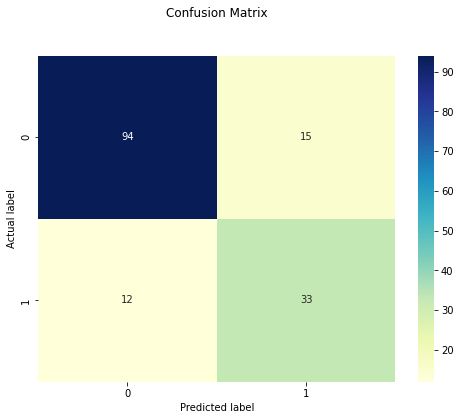

In [372]:
# Computing the confusion matrix
cnf_matrix = confusion_matrix(B_test, B_predict)

# Creating a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# Setting the title of the heatmap
plt.title('Confusion Matrix', y=1.1)

# Setting the label for the y-axis
plt.ylabel('Actual label')

# Setting the label for the x-axis
plt.xlabel('Predicted label')

# Displaying the heatmap
plt.show()

Classification Report

In [373]:
print(classification_report(B_test,B_predict))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       109
           1       0.69      0.73      0.71        45

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.83      0.82      0.83       154



Predictive System

In [375]:
# Defining the input data
input_data = (3, 140, 74, 24, 170, 26, 0.435, 50)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print("Standardized input data:", std_data)

# Make the prediction using the SVM model
prediction = SVM.predict(std_data)
print("Prediction:", prediction)

# Print the result based on the prediction
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

Standardized input data: [[-0.25095213  0.60185007  0.13313411 -0.57285614  0.31721922 -0.93580856
  -0.11137081  1.4259954 ]]
Prediction: [1]
The person is diabetic


C:\Users\tiffh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


When creating the predictive system, we cannot have a lot of categorized items. Therefore, I am adding some features in the data.

In [ ]:
# Create Nutritional status column

Nutritional_status = pd.Series([]) 

C:\Users\tiffh\AppData\Local\Temp\ipykernel_40096\1540612615.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Nutritional_status = pd.Series([])


In [ ]:
# Nutritional status based on BMI

for i in range(len(df)): 

    if df['BMI'][i] < 18.5: 
        Nutritional_status[i]="Underweight"
        
    elif df['BMI'][i] < 25: 
        Nutritional_status[i]="Normal"
  
    elif df['BMI'][i] >= 25 and df['BMI'][i] < 30: 
        Nutritional_status[i]="Overweight"
  
    elif df['BMI'][i] >= 30: 
        Nutritional_status[i]="Obese"
        
    else: 
        Nutritional_status[i]= df['BMI'][i] 

The category of the BMI Score. Source: https://www.cancer.org/cancer/risk-prevention/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html

In [ ]:
# Insert new column - Nutritional Status
df.insert(6, "Nutritional Status", Nutritional_status)

ValueError: cannot insert Nutritional Status, already exists

In [ ]:
# Check df containing new column
df.head (5)

,Pregnancies,Glucose,Glucose Result1,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,Impaired Glucose Tolerance,72.0,35.0,169.5,33.6,Obese,0.627,50,1
1,1,85.0,Normal,66.0,29.0,102.5,26.6,Overweight,0.351,31,0
2,8,183.0,Impaired Glucose Tolerance,64.0,32.0,169.5,23.3,Normal,0.672,32,1
3,1,89.0,Normal,66.0,23.0,94.0,28.1,Overweight,0.167,21,0
4,0,137.0,Normal,40.0,35.0,168.0,43.1,Obese,2.288,33,1


In [ ]:
df['Nutritional Status'].value_counts()

Obese          483
Overweight     179
Normal         102
Underweight      4
Name: Nutritional Status, dtype: int64

The original data has some missing values that were replaced by median. There are 106 over 768 women have normal weight or underweight.(Around 14%) Most of the women are overweight or obese.

In [ ]:
# Create OGTT_Interpretation (Interpretation of Glucose level) column 

OGTT_Interpretation = pd.Series([]) 

C:\Users\tiffh\AppData\Local\Temp\ipykernel_40096\1332369492.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  OGTT_Interpretation = pd.Series([])


In [ ]:
# Interpretation of OGTT (Glucose) - using OGTT levels recommended by DIABETES UK (2019)

for i in range(len(df)): 
    if df['Glucose'][i] <= 140: 
        OGTT_Interpretation [i]="Normal"
    
    elif df['Glucose'][i] > 140 and df['Glucose'][i] <= 199: 
        OGTT_Interpretation [i]="Impaired Glucose Tolerance"
        
    elif df['Glucose'][i] > 199: 
        OGTT_Interpretation[i]="Diabetic Level"
        
    else: 
        OGTT_Interpretation [i]= df['Glucose'][i] 

This Glucose level indicates the two hours after drinking the glucose solution and the different level indicates whether you are diabetic. Source: https://www.mayoclinic.org/tests-procedures/glucose-tolerance-test/about/pac-20394296#:~:text=A%20normal%20blood%20glucose%20level,eventually%20developing%20type%202%20diabetes.

In [ ]:
# Insert new column - Glucose Result
df.insert(2, "Glucose Result1", OGTT_Interpretation)

ValueError: cannot insert Glucose Result1, already exists

In [ ]:
df['Glucose Result1'].value_counts()

Normal                        576
Impaired Glucose Tolerance    192
Name: Glucose Result1, dtype: int64

From the result, there is no individual from the sample showed OGTT result at "Diabetic levels". 

In [ ]:
Impaired_Glucose_Tolerance_Diabetic = ((df ['Glucose'] > 140 ) & (df ['Glucose'] <= 199) & (df ['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

132

From the result, it showed that not every women with impaired glucose tolerance have diabetes. This might be showing that impaired glucose tolerance might be one of the risk of developing diabetes or diabetic.

In [ ]:
Normal_Glucose_Diabetic = ((df ['Glucose'] != 0 ) & (df ['Glucose'] <= 140) & (df ['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

136

There are half of the diabetic women showed normal glucose level, which might be concerning.

In [ ]:
df.min()

Pregnancies                                          0
Glucose                                           44.0
Glucose Result1             Impaired Glucose Tolerance
BloodPressure                                     24.0
SkinThickness                                      7.0
Insulin                                           14.0
BMI                                               18.2
Nutritional Status                              Normal
DiabetesPedigreeFunction                         0.078
Age                                                 21
Outcome                                              0
dtype: object

From the data, we can see that the minimun age is 21 years old. And, as we have filled the zero vaule with median, it does not have the invalid value.

In [ ]:
df.max()

Pregnancies                          17
Glucose                           199.0
Glucose Result1                  Normal
BloodPressure                     122.0
SkinThickness                      99.0
Insulin                           846.0
BMI                                67.1
Nutritional Status          Underweight
DiabetesPedigreeFunction           2.42
Age                                  81
Outcome                               1
dtype: object

For the maximum data, we can see that the nutritional status,"Underweight" does not mean "maximum". It was arranged alphabetically.

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

From this output, we know that the data is not balanced as it has more not diabetic than diabetic. 500 not diabetic and 268 are diabetic.

In [ ]:
# Check the average of features grouped by Outcome (Diabetes)

df.groupby('Outcome').mean()

C:\Users\tiffh\AppData\Local\Temp\ipykernel_40096\1411509627.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.622000,70.844000,27.170000,117.172000,30.846000,0.429734,31.190000
1,4.865672,142.302239,75.272388,32.671642,187.615672,35.398507,0.550500,37.067164


From the result, we can see that the average number of the features are higher with diabetic women.

In [ ]:
df.mean()

C:\Users\tiffh\AppData\Local\Temp\ipykernel_40096\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Pregnancies                   3.845052
Glucose                     121.677083
BloodPressure                72.389323
SkinThickness                29.089844
Insulin                     141.753906
BMI                          32.434635
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

The mean of Glucose, Bloodpressure, Skinthickness, Insulin and BMI all went up. The mean of Insulin went up a lot due to there were 374 0 value.

In [ ]:
df.max()

Pregnancies                          17
Glucose                           199.0
Glucose Result1                  Normal
BloodPressure                     122.0
SkinThickness                      99.0
Insulin                           846.0
BMI                                67.1
Nutritional Status          Underweight
DiabetesPedigreeFunction           2.42
Age                                  81
Outcome                               1
dtype: object

For the maximum data, we can see that the nutritional status,"Underweight" does not mean "maximum". It was arranged alphabetically.

In [ ]:
df_glucose.shape

(763, 9)

From above, we can see that most of the sample have data for glucose as it is an important information(same as insulin)to check on for diabetes.

In [ ]:
#Check the average of glucose from the data that is not zero.

df_glucose['Glucose'].mean()

121.6867627785059

This indicates that the average of glucose is at the normal range (less than 140 mg/dl).
Which somehow makes sense as the sampe has more women without diabetics.

In [ ]:
df_glucose.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.311871,110.643863,68.213280,19.631791,69.160966,30.317304,0.430662,31.247485
1,4.860902,142.319549,70.800752,22.056391,101.090226,35.106015,0.550605,37.052632


As we replaced the insulin 0 value with median. All the data are filled.  The maximum of glucose in this dataset is 199, which is diabetic level. However, not a lot of them are with high glucose, this might indicate that they have been taking drugs to control the level. We will require more information on those.

In [ ]:
df_BloodPressure.shape

(733, 9)

In [ ]:
# Check the average of blood pressure

df_BloodPressure['BloodPressure'].mean()

72.40518417462484

In [ ]:
# Minimum and Maximum for the Blood Pressure

df_BloodPressure['BloodPressure'].min()

24

In [ ]:
df_BloodPressure['BloodPressure'].max()

122

The maximum value of Diastolic Blood Pressure(lower number) shows that some women have hypertension (>90 mmHg) as blood pressure target for diabetes is under 140/90 mmHg and under 150/90 mmHg if the person is over 80 years(The British Diabetic Association, n.d.) And, for some people with kidney disease, the target might be 130/80 mmHg.

In this dataset, the Systolic Blood pressure is not included but it should have been as it is an indicator. The reason is the blood pressure can also indicate other diseases, such as kidney disease, heart disease and etc.(U.S. Department of Health & Human Services, 2021) On the other hand, if we look at the minimum value of f Diastolic Blood Pressure (24 mmHg) it is too low and will make people feel dizzy or get tired easily. The  Individual with Diastolic blood pressure less than 80 mmHg has low blood pressure and for older people, it should be between 90 and 60.(Windsor, 2015).

In [ ]:
df_insulin.shape

In [ ]:
df_insulin['Insulin'].mean()

In [ ]:
# Minimum and Maximum of Insulin value

df_insulin['Insulin'].min()

In [236]:
df_insulin['Insulin'].max()

846

The normal range of 2 hours insulin if from 16 to 166 mu U/mL. The average for this samples indicate normal range. There are some samples seem to have high insulin level. It might be due to obesity, type 2 diabetes mellitus or the data record in error.

In [235]:
df_BMI.shape

(757, 9)

In [237]:
df_BMI['BMI'].mean()

32.457463672391015

The average of BMI showed obesity (BMI >= 30 kg/m2)

In [238]:
df_BMI['BMI'].min()

18.2

In [239]:
df_BMI['BMI'].max()

67.1

The minimum value of BMI is 18.2 kg/m 2 is a little closer to underweight for 18.5 kg/m 2. The maximum is showing women with morbid obesity.(BMI >= 40kg/m 2)

In [244]:
# Drop the "Outcome" column for the new dataset

X = df.drop(columns='Outcome', axis=1)

# Creating the target variable
Y = df['Outcome']

In [245]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47


In [246]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [247]:
from sklearn.model_selection import train_test_split

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [260]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
602,1,124.0,74.0,36.0,102.5,27.8,0.100,30
429,1,95.0,82.0,25.0,180.0,35.0,0.233,43
623,0,94.0,70.0,27.0,115.0,43.5,0.347,21
209,7,184.0,84.0,33.0,169.5,35.5,0.355,41
589,0,73.0,70.0,27.0,102.5,21.1,0.342,25
...,...,...,...,...,...,...,...,...
534,1,77.0,56.0,30.0,56.0,33.3,1.251,24
584,8,124.0,76.0,24.0,600.0,28.7,0.687,52
493,4,125.0,70.0,18.0,122.0,28.9,1.144,45
527,3,116.0,74.0,15.0,105.0,26.3,0.107,24


In [289]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)




C:\Users\tiffh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [275]:
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)

In [277]:
print(classifier.coef_,classifier.intercept_)

[[ 0.1363884   0.02768087 -0.02287387  0.02546299  0.0047575   0.07687193
   1.40605144  0.01526403]] [-8.20118177]


In [290]:
classifier.score(X_test,y_test)

0.8181818181818182

In [291]:
from sklearn.metrics import confusion_matrix, classification_report

In [292]:
predictions = classifier.predict(X_test)

In [294]:
cm = confusion_matrix(y_test,predictions)
cm

array([[89,  4],
       [24, 37]], dtype=int64)

<AxesSubplot:>

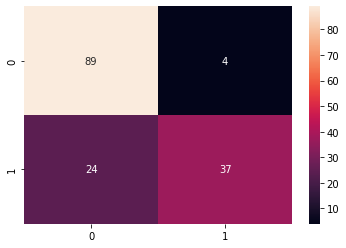

In [295]:
sns.heatmap(cm, annot=True)

In [296]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86        93
           1       0.90      0.61      0.73        61

    accuracy                           0.82       154
   macro avg       0.85      0.78      0.79       154
weighted avg       0.83      0.82      0.81       154



In [298]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [308]:
param_grid = {'n_neighbors': np.arange(1,50)}  
KNN = KNeighborsClassifier()
knn_gs = GridSearchCV(KNN, param_grid, cv = 5)
knn_gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [309]:
knn_gs.best_score_

0.8648540583766493

In [310]:
knn_gs.best_params_

{'n_neighbors': 12}

In [311]:
knn_gs.best_estimator_

KNeighborsClassifier(n_neighbors=12)

In [312]:
KNN = KNeighborsClassifier(n_neighbors=8)

In [313]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [314]:
y_hat = KNN.predict(X_test)

In [315]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [316]:
print(accuracy_score(y_test,y_hat))

0.8506493506493507


In [317]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88        93
           1       0.88      0.72      0.79        61

    accuracy                           0.85       154
   macro avg       0.86      0.83      0.84       154
weighted avg       0.85      0.85      0.85       154



In [318]:
print(confusion_matrix(y_test,y_hat))

[[87  6]
 [17 44]]


Random Forest

In [319]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [320]:
clf_y_pred = clf.predict(X_test)

<AxesSubplot:>

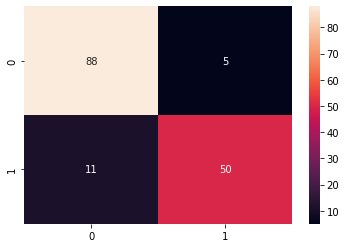

In [321]:
from sklearn.metrics import confusion_matrix
clf_cm = confusion_matrix(y_test,clf_y_pred)
sns.heatmap(clf_cm,annot = True)

In [322]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf_y_pred)

0.8961038961038961

Naive Bayes

In [323]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [324]:
gnb_y_pred = gnb.predict(X_test)

<AxesSubplot:>

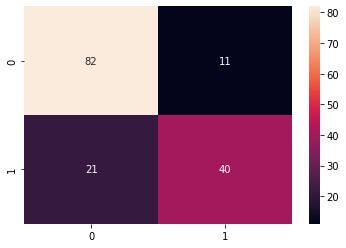

In [325]:
from sklearn.metrics import confusion_matrix
gnb_cm = confusion_matrix(y_test,gnb_y_pred)
sns.heatmap(gnb_cm,annot = True)

In [326]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,gnb_y_pred)

0.7922077922077922

Decision Tree

In [327]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,oob_score=True)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [376]:
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,random_state=42)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

<AxesSubplot:>

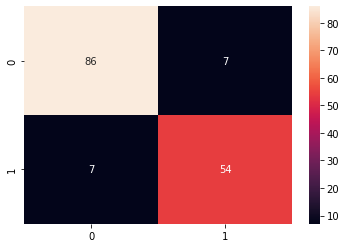

In [377]:
from sklearn.metrics import confusion_matrix
dt_cm = confusion_matrix(bagging.predict(X_test),y_test)
sns.heatmap(dt_cm,annot = True)

In [378]:
from sklearn.metrics import accuracy_score
accuracy_score(bagging.predict(X_test),y_test)

0.9090909090909091

Linear Discriminant Analysis

In [331]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=1)

In [332]:
lda_y_pred = lda.predict(X_test)

<AxesSubplot:>

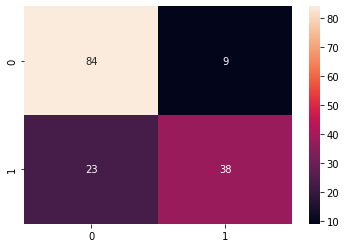

In [333]:
from sklearn.metrics import confusion_matrix
lda_cm = confusion_matrix(y_test,lda_y_pred)
sns.heatmap(lda_cm,annot = True)

In [334]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lda_y_pred)

0.7922077922077922

In [335]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lda_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        93
           1       0.81      0.62      0.70        61

    accuracy                           0.79       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [341]:
scaler = StandardScaler()

In [342]:
scaler.fit(X)

StandardScaler()

In [343]:
standardized_data = scaler.transform(X)
standardized_data

array([[ 0.63994726,  0.86462486, -0.03218035, ...,  0.16948251,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20472661, -0.52812374, ..., -0.84854874,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01426457, -0.69343821, ..., -1.32847775,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02224005, -0.03218035, ..., -0.90672195,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14199419, -1.02406713, ..., -0.33953311,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94195182, -0.19749482, ..., -0.2959032 ,
        -0.47378505, -0.87137393]])

In [344]:
# Assigning the standardized feature variables to X
X = standardized_data

# Assigning the 'Outcome' column from the diabetes_dataset DataFrame to Y
Y = df['Outcome']

In [345]:
# Creating an instance of the Support Vector Classifier (SVC)
# The kernel parameter is set to 'rbf' indicating a radial basis function kernel
# The random_state parameter is set to 0 for reproducibility
SVM = SVC(kernel='rbf', random_state=0)

In [347]:
# Fitting the SVM model to the training data
SVM.fit(X_train, y_train)

SVC(random_state=0)

In [348]:
# Calculate the accuracy score of the model on the training data
training_data_accuracy = SVM.score(X_train, y_train)

# Print the accuracy score of the training data
print('Accuracy score of the training data:', training_data_accuracy)

Accuracy score of the training data: 0.8485342019543974


In [349]:
# Calculate the accuracy score of the model on the testing data
testing_data_accuracy = SVM.score(X_test, y_test)

# Print the accuracy score of the testing data
print('Accuracy score of the testing data:', testing_data_accuracy)

Accuracy score of the testing data: 0.8636363636363636


In [352]:
# Predicting the target variable for the testing data
y_predict = SVM.predict(X_test)

# Computing the confusion matrix
confusion_matrix(y_test,y_predict)

# Creating a cross-tabulation table
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,83,10,93
1,11,50,61
All,94,60,154


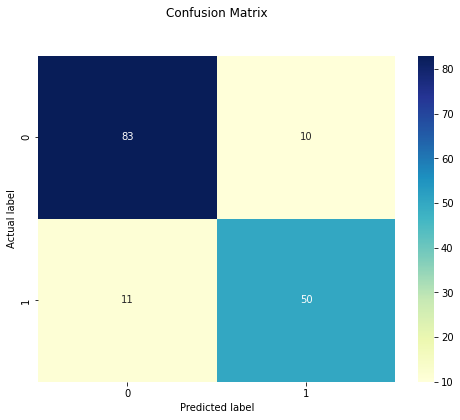

In [353]:
# Computing the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)

# Creating a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# Setting the title of the heatmap
plt.title('Confusion Matrix', y=1.1)

# Setting the label for the y-axis
plt.ylabel('Actual label')

# Setting the label for the x-axis
plt.xlabel('Predicted label')

# Displaying the heatmap
plt.show()

In [354]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89        93
           1       0.83      0.82      0.83        61

    accuracy                           0.86       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.86      0.86      0.86       154



In [355]:
# Defining the input data
input_data = (3, 140, 74, 24, 170, 26, 0.435, 50)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print("Standardized input data:", std_data)

# Make the prediction using the SVM model
prediction = SVM.predict(std_data)
print("Prediction:", prediction)

# Print the result based on the prediction
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

Standardized input data: [[-0.25095213  0.60185007  0.13313411 -0.57285614  0.31721922 -0.93580856
  -0.11137081  1.4259954 ]]
Prediction: [0]
The person is not diabetic


C:\Users\tiffh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\tiffh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [379]:
clf = DecisionTreeClassifier(random_state=0)

In [380]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [382]:
y_pred = clf.predict(X_test)

In [385]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8636363636363636
